In [2]:
import os
os.environ['DJANGO_SETTINGS_MODULE'] = 'ClusterCast.settings'
import test_utils
import django
django.setup()
import sys
sys.path.append("/home/ajp031/StockDeepLearning/ClusterCast/ClusterCast")
from asgiref.sync import sync_to_async
from importlib import reload
import ClusterPipeline.models.ClusterProcessing as cp
import ClusterPipeline.models.SequencePreprocessing as sp
from copy import deepcopy
import numpy as np
from tensorflow.keras.backend import clear_session
import random

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5fc37fde10>
Traceback (most recent call last):
  File "/usr/remote/apps/anaconda/2023.03-acet116/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/remote/apps/anaconda/2023.03-acet116/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/remote/apps/anaconda/2023.03-acet116/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/remote/apps/anaconda/2023.03-acet116/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
2024-03-06 21:40:25.753890: I tensorflow/core/pl

In [3]:
reload(test_utils)

<module 'test_utils' from '/home/ajp031/ClusterCast/test_utils.py'>

In [4]:
group_ids = [40]
groups = await test_utils.extract_cluster_groups(group_ids)

Creating and Processing Dataset
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Empty DataFrame
Columns: []
Index: [2007-01-03 00:00:00]
                macd  macd_signal  macd_diff
Date                                        
2007-01-03 -0.074251     0.026503  -0.061887
Empty DataFrame
Columns: []
Index: [2007-01-03 00:00:00]
              stoch_k    stoch_d
Date                            
2007-01-03  19.435424  13.336049
first date stoch: 2007-01-03 00:00:00
last date stoch: 2024-02-28 00:00:00
first date df: 2007-01-03 00:00:00
last date df: 2024-02-28 00:00:00
Scaling Quant Min Max Features
Quant Min Max Features Scaled
Scaling Standard
Name: momentum_vars len 10
Name: pctChg_vars len 115
Name: lag_features_vars len 230
Name: pctChgopen_rolling len 1
Name: pctChghigh_rolling len 1
Name: pctChglow_rolling len 1
Name: pctChgclose_rolling len 1
Name: pctChgvolume_rolling len 1
Name: pctChgVix_ro

In [5]:
clusters = await test_utils.get_all_clusters(groups)

cur_group = groups[0]

In [6]:
cluster_of_interest_id = 445
cluster_of_interest = [cluster for cluster in clusters if cluster.id == cluster_of_interest_id][0]

In [7]:
features = groups[0].group_params.training_features

features

['pctChgopen',
 'pctChghigh',
 'pctChglow',
 'pctChgclose',
 'pctChgvolume',
 'pctChgVix',
 'pctDiff+sma5_close',
 'pctDiff+sma5_sma10',
 'pctDiff+sma5_sma20',
 'pctDiff+sma5_sma30',
 'pctDiff+sma5_sma50',
 'pctDiff+sma5_sma100',
 'pctDiff+sma5_sma200',
 'pctDiff+sma10_sma20',
 'pctDiff+sma10_sma30',
 'pctDiff+sma10_sma50',
 'pctDiff+sma10_sma100',
 'pctDiff+sma10_sma200',
 'pctDiff+sma20_sma30',
 'pctDiff+sma20_sma50',
 'pctDiff+sma20_sma100',
 'pctDiff+sma20_sma200',
 'pctDiff+sma30_sma50',
 'pctDiff+sma30_sma100',
 'pctDiff+sma30_sma200',
 'pctDiff+sma50_sma100',
 'pctDiff+sma50_sma200',
 'pctDiff+sma100_sma200',
 'pctDiff+sma10_close',
 'pctDiff+sma20_close',
 'pctDiff+sma30_close',
 'pctDiff+sma50_close',
 'pctDiff+sma100_close',
 'pctDiff+sma200_close',
 'pctDiff+ema5_close',
 'pctDiff+ema10_close',
 'pctDiff+ema20_close',
 'pctDiff+ema30_close',
 'pctDiff+ema50_close',
 'pctDiff+ema100_close',
 'pctDiff+ema200_close',
 'pctDiff+ema5_ema10',
 'pctDiff+ema5_ema20',
 'pctDiff+ema5_

In [8]:
X_train, y_train, X_test, y_test = cluster_of_interest.get_3d_array()


In [9]:
print(X_test[0, :,0])
print(cluster_of_interest.test_seq_elements[0].seq_x[:,0])
print(cluster_of_interest.test_seq_elements[0].start_date)

[18.14 16.87 15.66 14.91 14.89 14.81 14.45 15.29 14.17 14.76 14.16 14.18
 14.32 13.8  13.41 13.35 12.85 12.46 12.69 12.69 12.98 12.92 12.63 13.08
 12.85 12.97 13.06 12.35 12.63 12.07 12.19 12.48 12.28 12.56 12.53 13.67
 13.65 13.03 12.99 12.43 12.47 12.45 13.2  14.04 14.13 13.35 13.08 12.76
 12.69 12.44]
[18.13999939 16.87000084 15.65999985 14.90999985 14.89000034 14.81000042
 14.44999981 15.28999996 14.17000008 14.76000023 14.15999985 14.18000031
 14.31999969 13.80000019 13.40999985 13.35000038 12.85000038 12.46000004
 12.68999958 12.68999958 12.97999954 12.92000008 12.63000011 13.07999992
 12.85000038 12.97000027 13.06000042 12.35000038 12.63000011 12.06999969
 12.18999958 12.47999954 12.27999973 12.56000042 12.52999973 13.67000008
 13.64999962 13.02999973 12.98999977 12.43000031 12.47000027 12.44999981
 13.19999981 14.03999996 14.13000011 13.35000038 13.07999992 12.76000023
 12.68999958 12.43999958]
2023-10-31 00:00:00


In [10]:
# reverse X_train, y_train, X_test, y_test
X_train = X_train.copy()[::-1]
y_train = y_train.copy()[::-1]
X_test = X_test.copy()[::-1]
y_test = y_test.copy()[::-1]

In [11]:
print(X_test[0, :,50])
print(cluster_of_interest.test_seq_elements[-1].seq_x[:,50])
print(cluster_of_interest.test_seq_elements[-1].start_date)

[ 0.19019993  0.20867497  0.22032498  0.23789993  0.27039993  0.28002495
  0.29114994  0.2961249   0.26749992  0.23919994  0.23814994  0.21359996
  0.18404995  0.18742493  0.18917492  0.18469986  0.19644989  0.20847496
  0.23392494  0.27984992  0.33374995  0.41324994  0.46732494  0.5049
  0.553175    0.618725    0.68375003  0.76645005  0.86065006  0.93750006
  0.97175     1.0058      1.0221751   1.0102501   0.9918501   0.96222514
  0.90890014  0.8956501   0.8381251   0.75370014  0.6502751   0.54985017
  0.45305017  0.37420014  0.2801251   0.19617508  0.10395005 -0.00142498
 -0.09402496 -0.18132496]
[ 0.19019993  0.20867497  0.22032498  0.23789993  0.27039993  0.28002495
  0.29114994  0.29612491  0.26749992  0.23919994  0.23814994  0.21359996
  0.18404995  0.18742493  0.18917492  0.18469986  0.19644989  0.20847496
  0.23392494  0.27984992  0.33374995  0.41324994  0.46732494  0.50489998
  0.55317497  0.618725    0.68375003  0.76645005  0.86065006  0.93750006
  0.97175002  1.00580001  1.0

In [12]:
target_features = [] 
# target_features += ['pctChgclose{}_target'.format(i) for i in range(-14, 0) ]
# target_features += ['pctChgclose-0_target']
target_features += ['pctChgclose+{}_target'.format(i) for i in range(1, 16) ]
print(features)
training_features = random.sample(features, 20)
training_features += ['pctChgvolume', 'pctChgclose']
print(training_features)
y_feature_sets = cur_group.group_params.y_feature_sets


['pctChgopen', 'pctChghigh', 'pctChglow', 'pctChgclose', 'pctChgvolume', 'pctChgVix', 'pctDiff+sma5_close', 'pctDiff+sma5_sma10', 'pctDiff+sma5_sma20', 'pctDiff+sma5_sma30', 'pctDiff+sma5_sma50', 'pctDiff+sma5_sma100', 'pctDiff+sma5_sma200', 'pctDiff+sma10_sma20', 'pctDiff+sma10_sma30', 'pctDiff+sma10_sma50', 'pctDiff+sma10_sma100', 'pctDiff+sma10_sma200', 'pctDiff+sma20_sma30', 'pctDiff+sma20_sma50', 'pctDiff+sma20_sma100', 'pctDiff+sma20_sma200', 'pctDiff+sma30_sma50', 'pctDiff+sma30_sma100', 'pctDiff+sma30_sma200', 'pctDiff+sma50_sma100', 'pctDiff+sma50_sma200', 'pctDiff+sma100_sma200', 'pctDiff+sma10_close', 'pctDiff+sma20_close', 'pctDiff+sma30_close', 'pctDiff+sma50_close', 'pctDiff+sma100_close', 'pctDiff+sma200_close', 'pctDiff+ema5_close', 'pctDiff+ema10_close', 'pctDiff+ema20_close', 'pctDiff+ema30_close', 'pctDiff+ema50_close', 'pctDiff+ema100_close', 'pctDiff+ema200_close', 'pctDiff+ema5_ema10', 'pctDiff+ema5_ema20', 'pctDiff+ema5_ema30', 'pctDiff+ema5_ema50', 'pctDiff+ema5

In [13]:
# for feature_set in y_feature_sets:
#     print(feature_set)
#     print(type(feature_set))
y_feature_sets = y_feature_sets[:-1]

In [14]:
reload(test_utils)

<module 'test_utils' from '/home/ajp031/ClusterCast/test_utils.py'>

In [15]:
print(target_features)
print(len(target_features))

['pctChgclose+1_target', 'pctChgclose+2_target', 'pctChgclose+3_target', 'pctChgclose+4_target', 'pctChgclose+5_target', 'pctChgclose+6_target', 'pctChgclose+7_target', 'pctChgclose+8_target', 'pctChgclose+9_target', 'pctChgclose+10_target', 'pctChgclose+11_target', 'pctChgclose+12_target', 'pctChgclose+13_target', 'pctChgclose+14_target', 'pctChgclose+15_target']
15


In [16]:
y_feature_dict = cur_group.y_feature_dict
X_feature_dict = cur_group.X_feature_dict

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_feature_dict)

(494, 50, 517)
(494, 45)
(82, 50, 517)
(82, 45)
{'pctChgclose+10_target': 0, 'pctChgclose+11_target': 1, 'pctChgclose+12_target': 2, 'pctChgclose+13_target': 3, 'pctChgclose+14_target': 4, 'pctChgclose+15_target': 5, 'pctChgclose+1_target': 6, 'pctChgclose+2_target': 7, 'pctChgclose+3_target': 8, 'pctChgclose+4_target': 9, 'pctChgclose+5_target': 10, 'pctChgclose+6_target': 11, 'pctChgclose+7_target': 12, 'pctChgclose+8_target': 13, 'pctChgclose+9_target': 14, 'pctChgclose-0_target': 15, 'pctChgclose-10_target': 16, 'pctChgclose-11_target': 17, 'pctChgclose-12_target': 18, 'pctChgclose-13_target': 19, 'pctChgclose-14_target': 20, 'pctChgclose-1_target': 21, 'pctChgclose-2_target': 22, 'pctChgclose-3_target': 23, 'pctChgclose-4_target': 24, 'pctChgclose-5_target': 25, 'pctChgclose-6_target': 26, 'pctChgclose-7_target': 27, 'pctChgclose-8_target': 28, 'pctChgclose-9_target': 29, 'sumPctChgclose+1': 30, 'sumPctChgclose+10': 31, 'sumPctChgclose+11': 32, 'sumPctChgclose+12': 33, 'sumPctChgc

In [17]:

X_train_filtered = test_utils.filter_by_features(X_train, training_features, X_feature_dict)
X_test_filtered = test_utils.filter_by_features(X_test, training_features, X_feature_dict)
y_train_filtered = test_utils.filter_y_by_features(y_train, target_features, y_feature_dict)
y_test_filtered = test_utils.filter_y_by_features(y_test, target_features, y_feature_dict)
print(X_train_filtered.shape)
print(y_train_filtered.shape)
print(X_test_filtered.shape)
print(y_test_filtered.shape)

[6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5]
[6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5]
(494, 50, 22)
(494, 15)
(82, 50, 22)
(82, 15)


In [18]:
training_model, test_model = test_utils.create_attention_model(input_steps=X_train.shape[1],output_steps=len(target_features),features=len(training_features))


2024-03-06 21:41:15.488056: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-06 21:41:15.534347: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-06 21:41:15.534672: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [19]:
training_model = test_utils.train_model(training_model, (X_train, y_train, X_test, y_test), training_features, 
                                                   target_features, X_feature_dict, y_feature_dict,
                                                   epochs = 100, batch_size = 10, lr = 0.0001, early_stopping_patience = 15,
                                                   loss = 'mse')

[6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5]
[6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5]


Epoch 1/100


2024-03-06 21:41:18.984714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-06 21:41:18.987387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-06 21:41:18.989073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

49/50 [============================>.] - ETA: 0s - loss: 0.8987

2024-03-06 21:41:42.404630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-06 21:41:42.406540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-06 21:41:42.408375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

50/50 [==============================] - 26s 86ms/step - loss: 0.9016 - val_loss: 0.7949
Epoch 2/100
50/50 [==============================] - 2s 44ms/step - loss: 0.7630 - val_loss: 0.7285
Epoch 3/100
50/50 [==============================] - 2s 44ms/step - loss: 0.7199 - val_loss: 0.6906
Epoch 4/100
50/50 [==============================] - 2s 45ms/step - loss: 0.6861 - val_loss: 0.6588
Epoch 5/100
50/50 [==============================] - 2s 45ms/step - loss: 0.6544 - val_loss: 0.6299
Epoch 6/100
50/50 [==============================] - 2s 44ms/step - loss: 0.6256 - val_loss: 0.6047
Epoch 7/100
50/50 [==============================] - 2s 45ms/step - loss: 0.5993 - val_loss: 0.5814
Epoch 8/100
50/50 [==============================] - 2s 44ms/step - loss: 0.5750 - val_loss: 0.5588
Epoch 9/100
50/50 [==============================] - 2s 44ms/step - loss: 0.5536 - val_loss: 0.5373
Epoch 10/100
50/50 [==============================] - 2s 44ms/step - loss: 0.5329 - val_loss: 0.5181
Epoch 11/1

In [20]:
num_days = 15
attention_model_accuracy, attention_results, predicted_y, attention_weights = test_utils.eval_model(X_test_filtered, y_test_filtered, test_model,num_days)

2024-03-06 21:44:56.181947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-06 21:44:56.184298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-06 21:44:56.186013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 2s 11ms/step
<class 'list'> 2
(82, 15)
15


In [21]:
predicted_y_transformed = np.zeros_like(predicted_y)
for i, feature in enumerate(target_features):
    scaler = [feature_set for feature_set in y_feature_sets if feature == feature_set.name][0].scaler
    predicted_y_transformed[:, i] = scaler.inverse_transform(predicted_y[:, i].reshape(-1, 1)).reshape(-1)

In [22]:
reload(test_utils)

<module 'test_utils' from '/home/ajp031/ClusterCast/test_utils.py'>

In [23]:
print(attention_model_accuracy)
test_utils.visualize_future_distribution(attention_results)

Cluster Number:
Accuracy1D 56.1% PredictedRet: -0.0015583147760480642 ActRet: 0.042614544446511964
Accuracy2D 59.76% PredictedRet: 0.02523837238550186 ActRet: 0.05408706481954673
Accuracy3D 54.88% PredictedRet: 0.04516249895095825 ActRet: 0.05264836099998253
Accuracy4D 56.1% PredictedRet: 0.09678051620721817 ActRet: 0.08256076360348522
Accuracy5D 59.76% PredictedRet: 0.1424327939748764 ActRet: 0.1362516547030792
Accuracy6D 59.76% PredictedRet: 0.17362381517887115 ActRet: 0.1979659266043
Accuracy7D 63.41% PredictedRet: 0.2242504507303238 ActRet: 0.26730583928434587
Accuracy8D 65.85% PredictedRet: 0.2515561282634735 ActRet: 0.30428349458408066
Accuracy9D 68.29% PredictedRet: 0.30379337072372437 ActRet: 0.3617815069354525
Accuracy10D 70.73% PredictedRet: 0.3452984690666199 ActRet: 0.40215133430390826
Accuracy11D 71.95% PredictedRet: 0.3848227858543396 ActRet: 0.47946897096841073
Accuracy12D 71.95% PredictedRet: 0.44385826587677 ActRet: 0.5292797760765363
Accuracy13D 71.95% PredictedRet: 0

2021-01-08 00:00:00
2021-01-08 00:00:00
[]


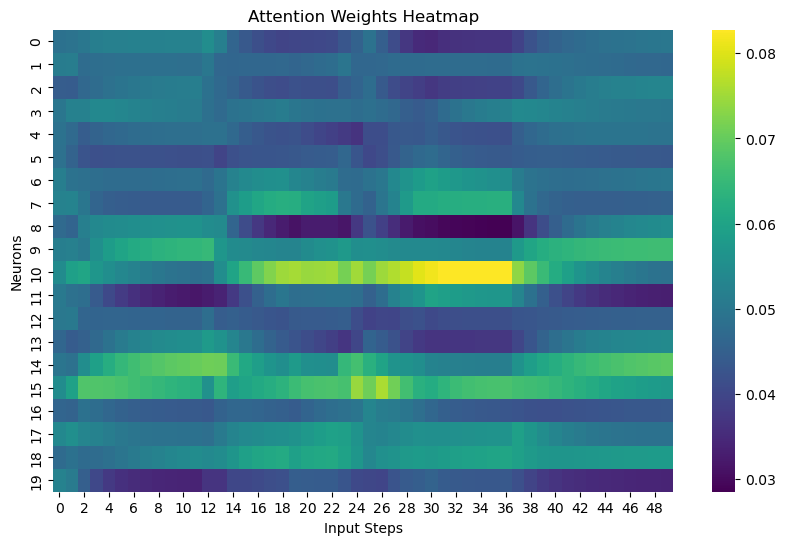

(15,)
15
[328.01096370129216, 330.8118358427404, 325.96576861921227, 321.3494172813508, 322.2053566831768, 319.8626856861636, 323.59024635529977, 320.9334190226074, 319.142053704043, 314.8034534173005, 314.3049600790244, 321.04322089093966, 321.7548026022686, 327.3148904201096, 318.82487827630234]


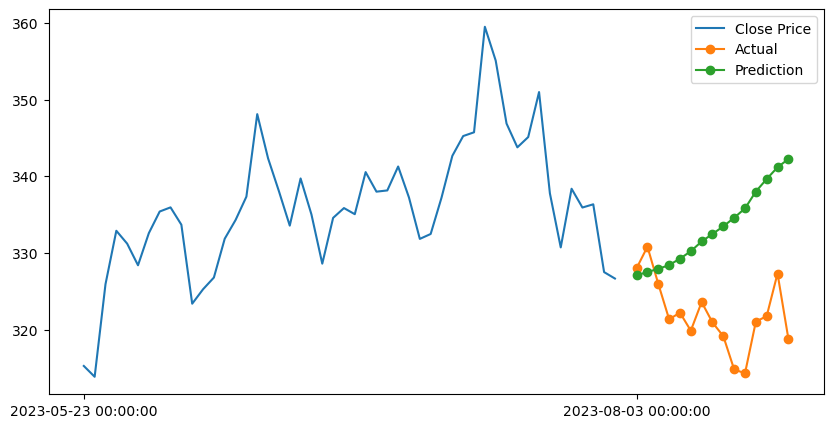

[]


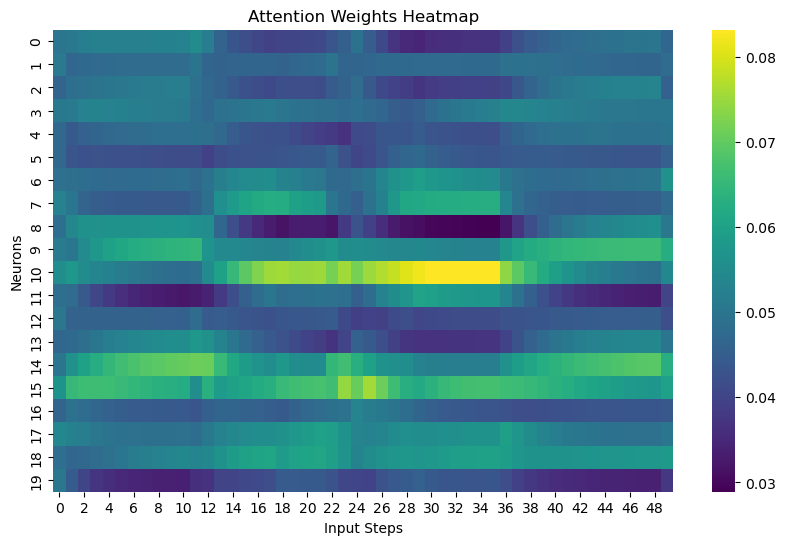

(15,)
15
[330.59047406495347, 325.72779148733537, 321.09561240533725, 321.9544865036057, 319.6037833629312, 323.3357065498295, 320.66976994876495, 318.87226270775096, 314.5187869814624, 314.0185844957591, 320.7799482866834, 321.49396974586404, 327.0731210276654, 318.55399980396066, 322.2817426269387]


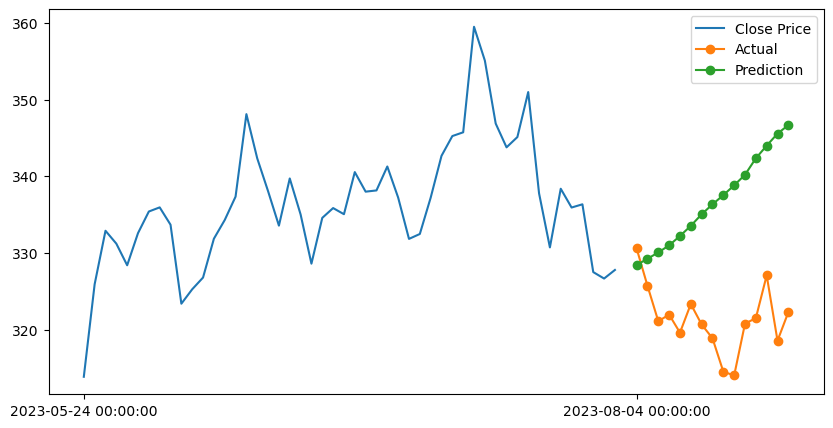

[]


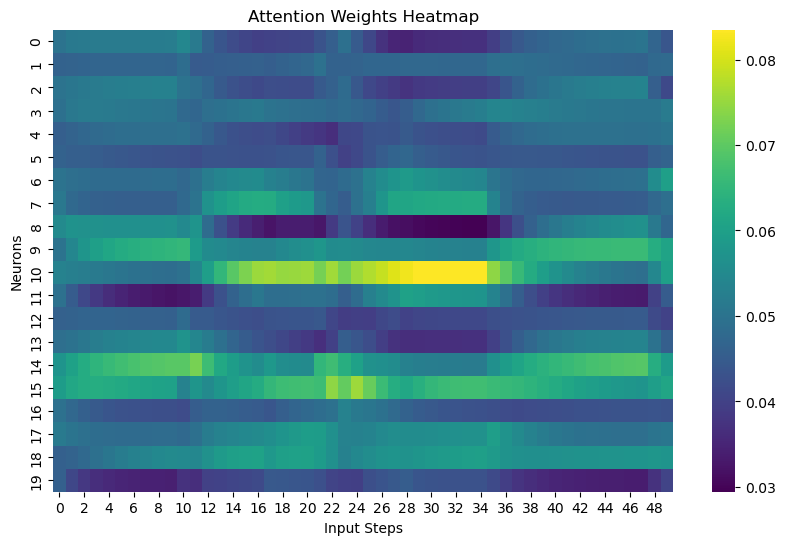

(15,)
15
[325.2127369518892, 320.5476305555291, 321.41260986193623, 319.0451970172726, 322.80364815263204, 320.1248037858737, 318.3145191705516, 313.9300972607781, 313.4263391430062, 320.2357653138857, 320.9548623128137, 326.57367235237837, 317.99399393136855, 321.7482349871696, 322.6378889425023]


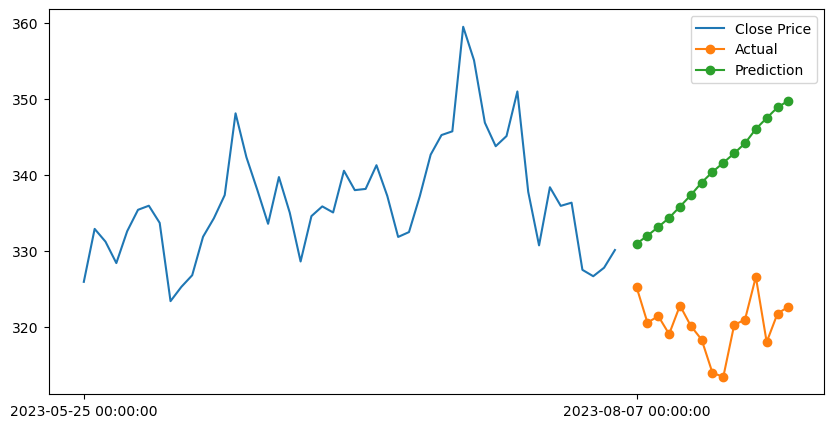

[]


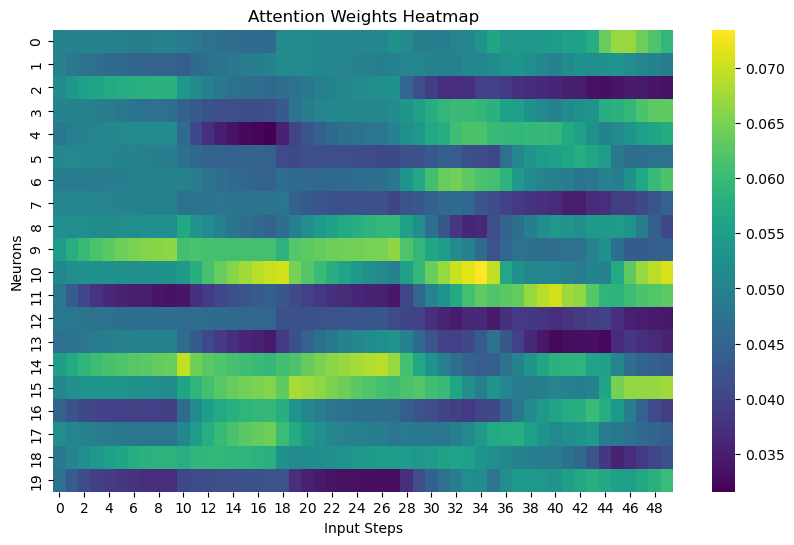

(15,)
15
[376.12116682304867, 377.42343978811357, 385.6626961335594, 387.8182446959188, 392.2468469423501, 394.3022222298463, 393.39089201303585, 398.4135731441936, 403.8316796562199, 401.422892285345, 404.10266773436166, 408.18186811899, 410.7330325603787, 409.7008157487842, 416.0736209612493]


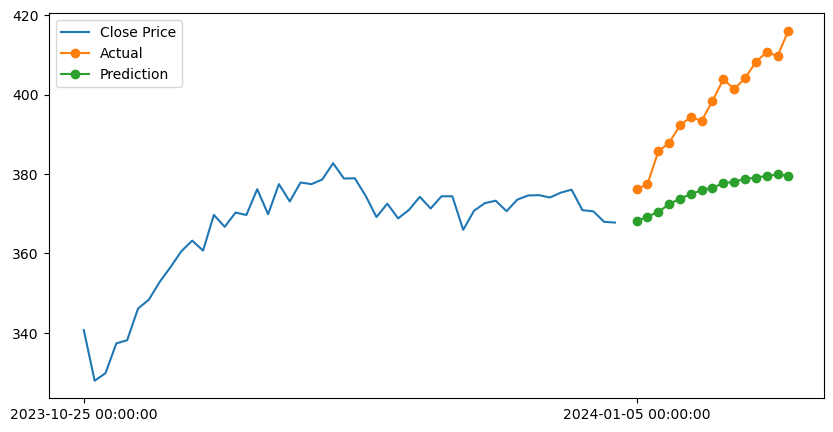

[]


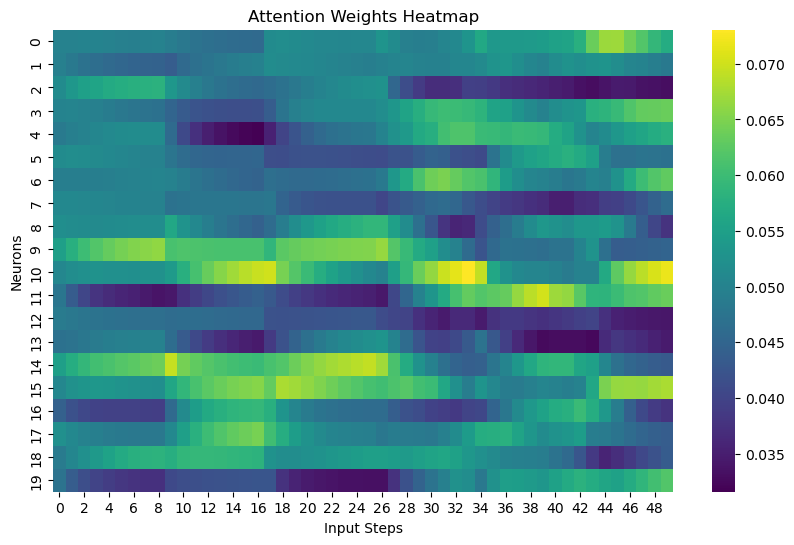

(15,)
15
[376.0168512801813, 384.4115949380752, 386.60782198387534, 391.1199986977499, 393.21416204646493, 392.28772338303907, 397.40519015474786, 402.9255445863425, 400.4712997301251, 403.20164662212915, 407.35782772906424, 409.9571365279014, 408.905440213404, 415.3985099635526, 414.14920018441035]


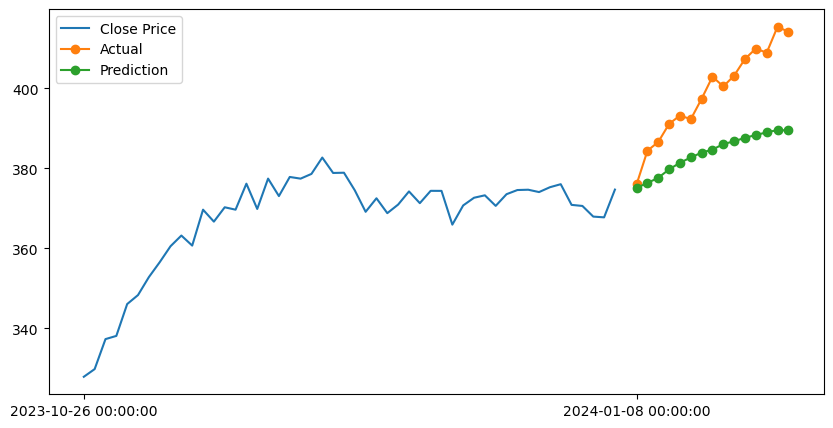

[]


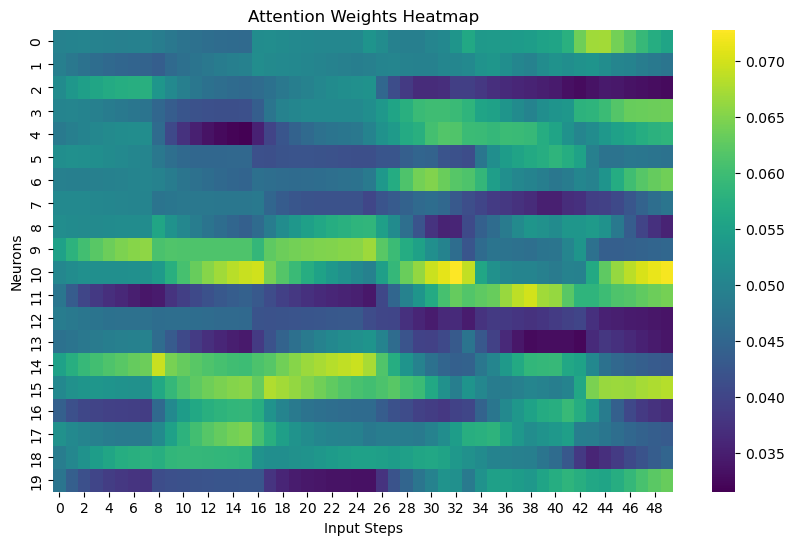

(15,)
15
[384.20939729396036, 386.41207197150766, 390.9374954277374, 393.0378067719963, 392.10864829171476, 397.2295879683669, 402.766148926767, 400.30469895617836, 403.04306153642165, 407.21144426217535, 409.8183840506973, 408.763600190876, 415.27573214260235, 414.0227546691707, 402.0706865420999]


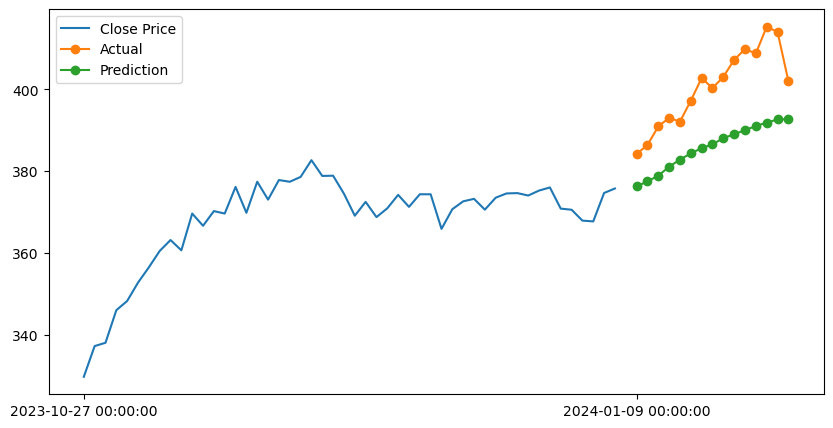

[]


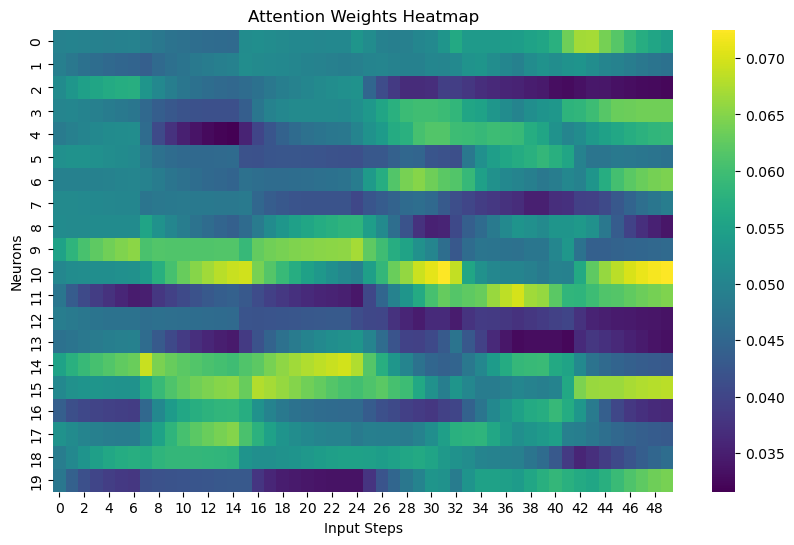

(15,)
15
[385.01357650390366, 389.6230558600218, 391.76237870492696, 390.8159618944683, 396.0320186793775, 401.6587249099827, 399.15155559526875, 401.94078093634073, 406.1865878334414, 408.8419493159769, 407.767573741174, 414.4006630169361, 413.1244125503608, 400.95034490177227, 408.1665817076876]


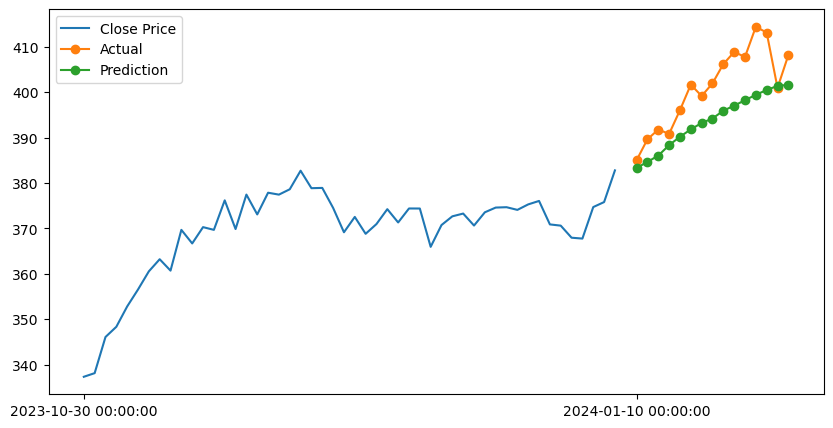

[]


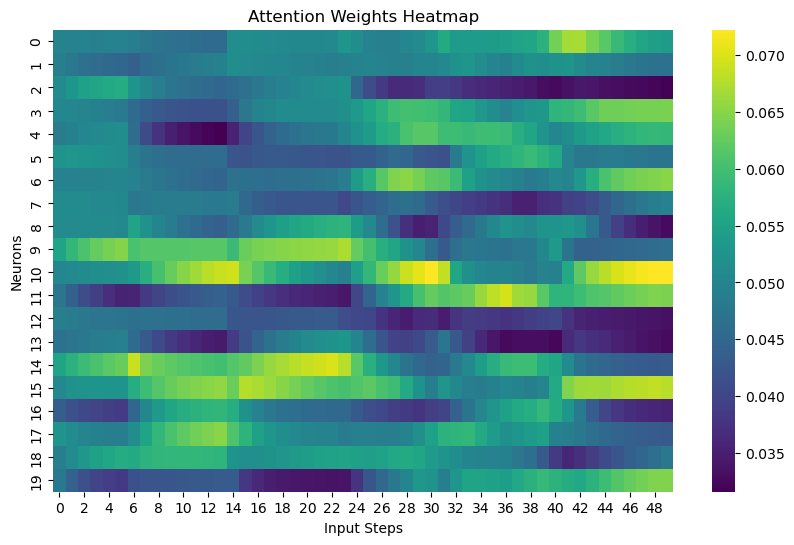

(15,)
15
[389.2618833428231, 391.41160192029605, 390.46058613307116, 395.7019895978997, 401.35603800051507, 398.84235538149903, 401.6451345631174, 405.91157334994966, 408.5798381808081, 407.50024183197405, 414.16556365383036, 412.8831114311379, 400.64988564667584, 407.9011887204798, 416.4691263538942]


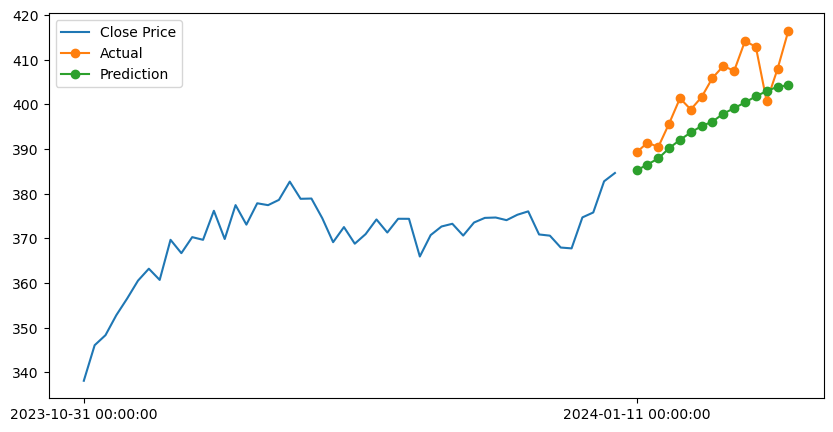

[]


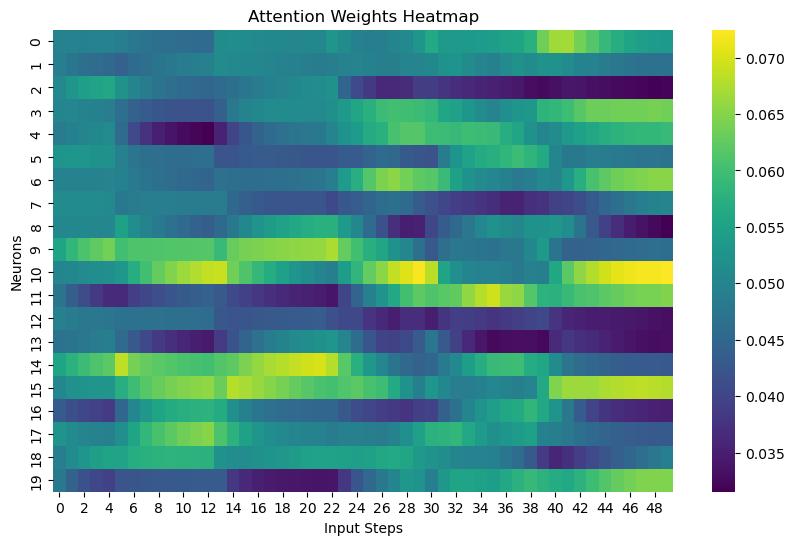

(15,)
15
[390.64118175215833, 389.6806713932831, 394.97440299126515, 400.68489921356354, 398.1461209651658, 400.97051127401625, 405.279544525943, 407.9744482748498, 406.88407365605946, 413.61593945800536, 412.3206837312281, 399.9653261795701, 407.28902344232154, 415.9425000319221, 409.58122906017024]


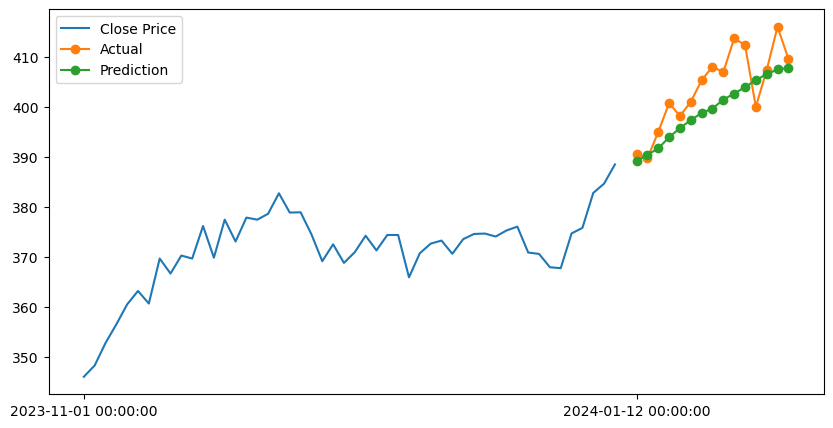

[]


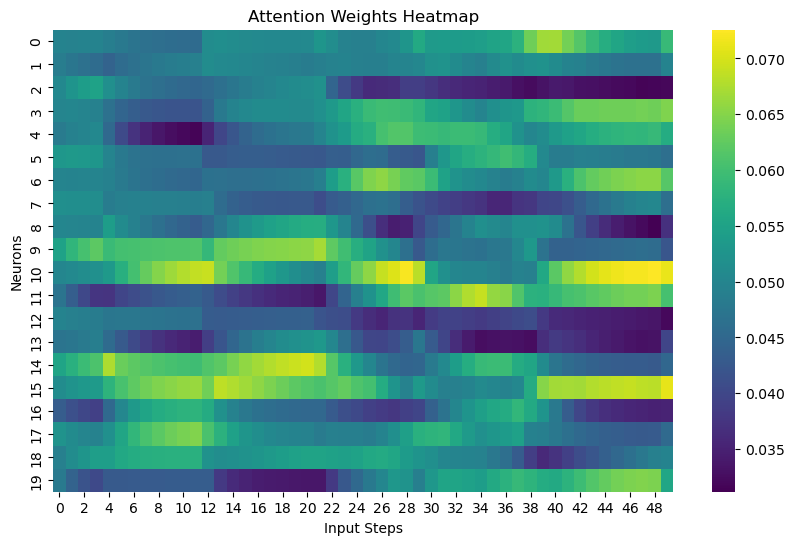

(15,)
15
[389.3050281002736, 394.6232883677171, 400.3602443512831, 397.8097025951709, 400.6471798040717, 404.9664363935892, 407.67382706255677, 406.5784001591694, 413.34145826999196, 412.0402009356526, 399.62759445177113, 406.9852262928193, 415.6787990344498, 409.2880529164551, 409.10195201567143]


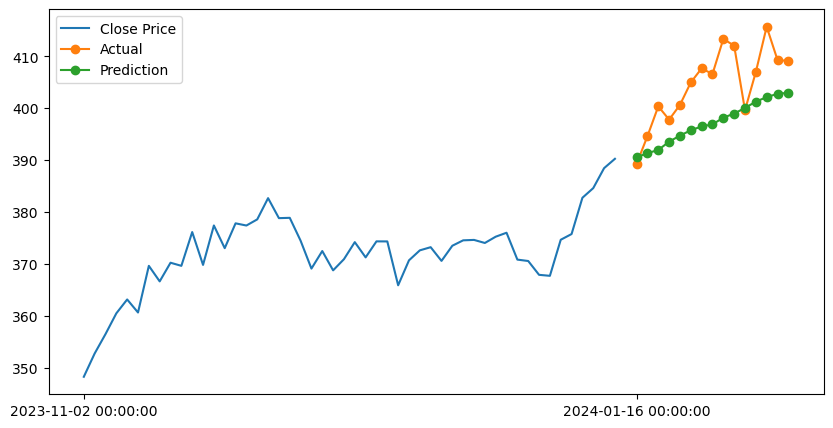

[]


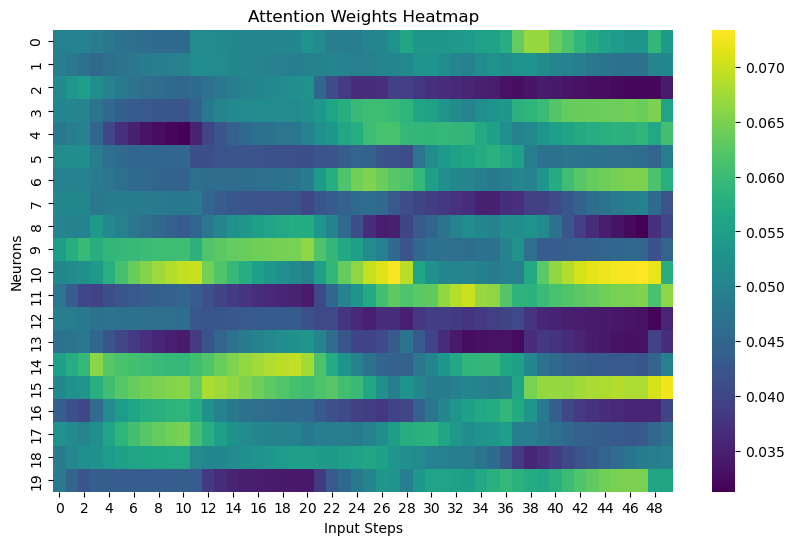

(15,)
15
[394.77735994968975, 400.50255613904955, 397.95724256426774, 400.7889034224527, 405.0993062629155, 407.7950665153343, 406.7018850527327, 413.45108003268666, 412.15249005687417, 399.76532732717715, 407.1078772612796, 415.7836296419642, 409.40598347791496, 409.22026405265603, 419.1599433626118]


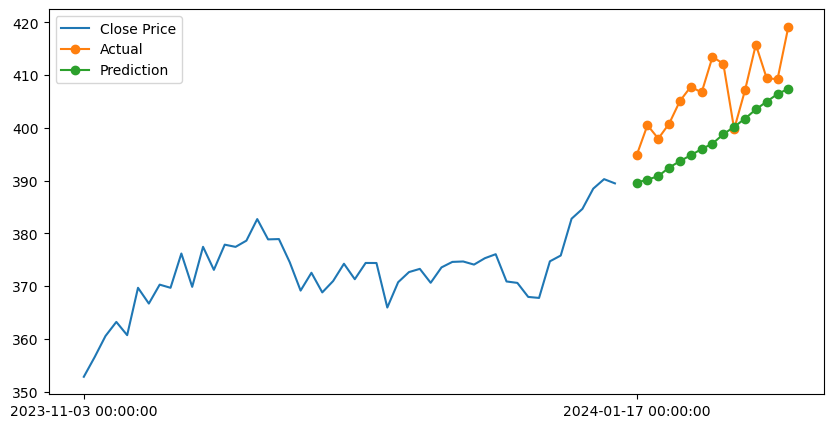

[]


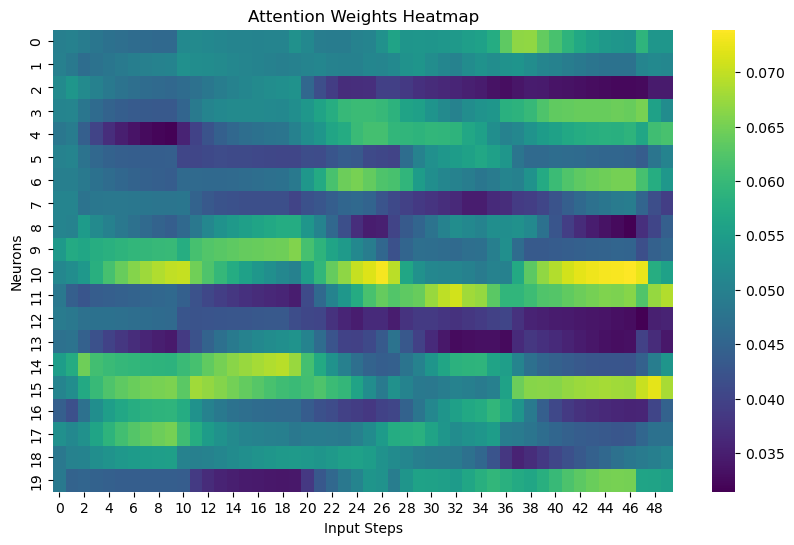

(15,)
15
[399.6598710718961, 397.0858021009128, 399.94945333179373, 404.3085524675552, 407.0347677707349, 405.93172422247335, 412.75716747989384, 411.4439068286771, 398.9168015097316, 406.34230308271106, 415.1160688082047, 408.6663718979932, 408.478554328243, 418.5305260565101, 418.5995243846542]


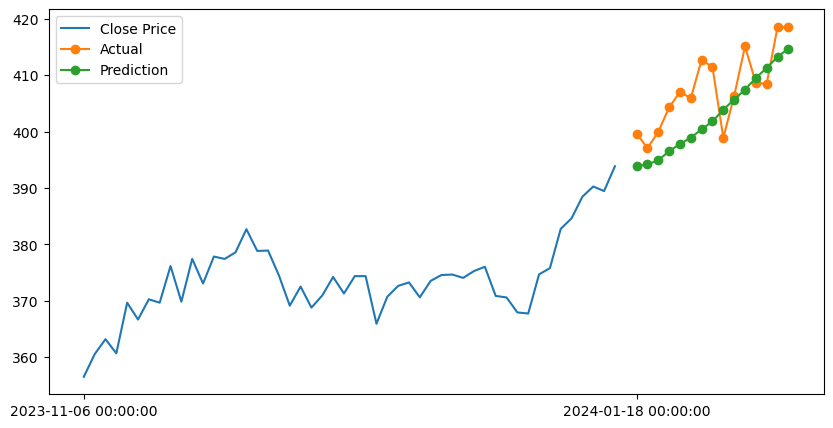

[]


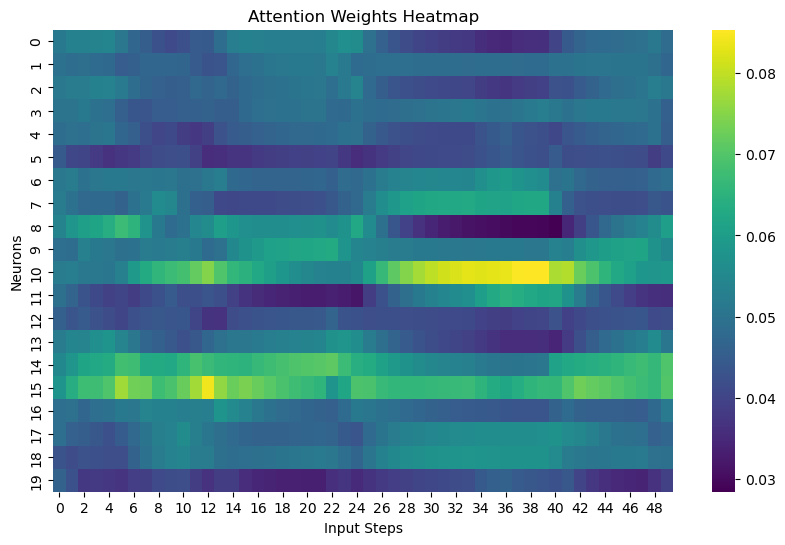

(15,)
15
[153.6499938855657, 154.29518034851094, 156.65745376998825, 155.12308385507092, 154.1005232792273, 149.24991575120148, 149.84455540436883, 148.38414365295193, 149.3224675327376, 149.0765039580504, 146.27422376396413, 143.01175818858272, 143.53530672422147, 146.1122278242088, 147.1369733426401]


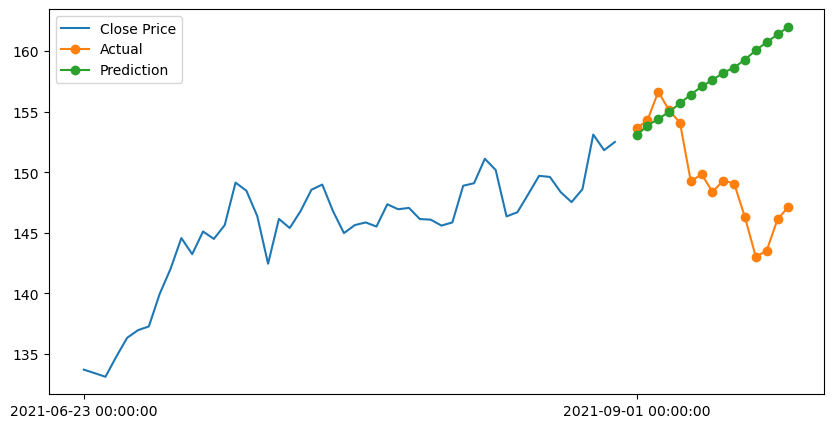

[]


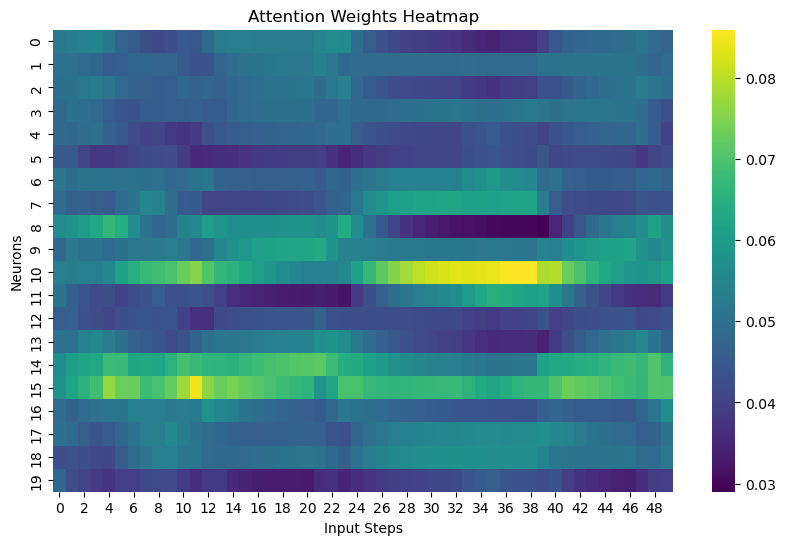

(15,)
15
[154.3000030740087, 156.6799342907497, 155.1305867692129, 154.10271542673087, 149.21585001515285, 149.81493454974495, 148.34360634324176, 149.2889441151576, 149.0411419834242, 146.21791498043393, 142.93106274910443, 143.45852476604, 146.05470813464555, 147.08860037782347, 147.1827768875025]


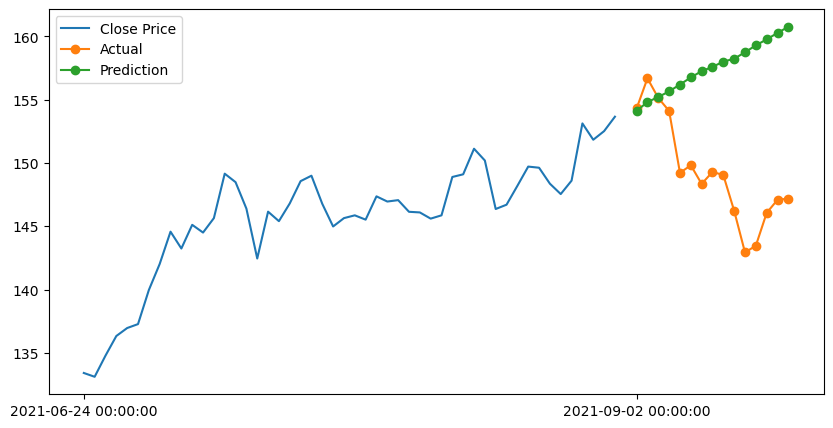

[]


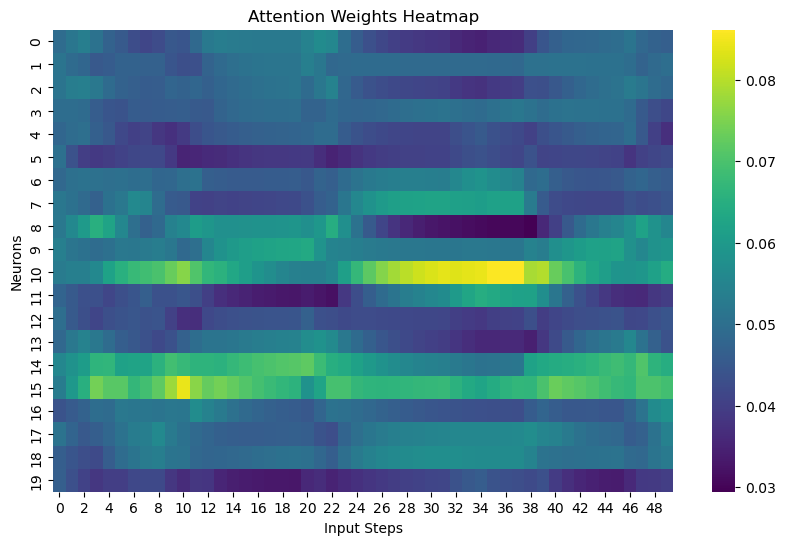

(15,)
15
[156.69000245685712, 155.13410049266682, 154.09953813179672, 149.19199906330823, 149.79275278287415, 148.31520019080224, 149.26453717020902, 149.0156867230788, 146.1805161895174, 142.87975908264434, 143.4094525031184, 146.01661890475614, 147.05488498099837, 147.14959610098012, 145.5217341069719]


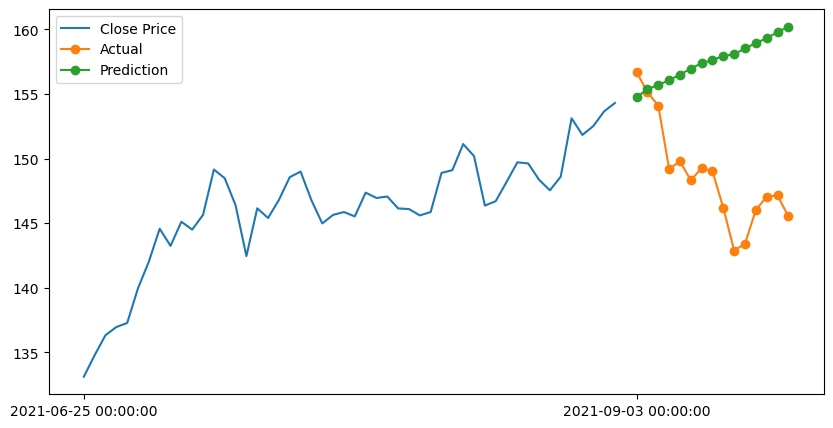

[]


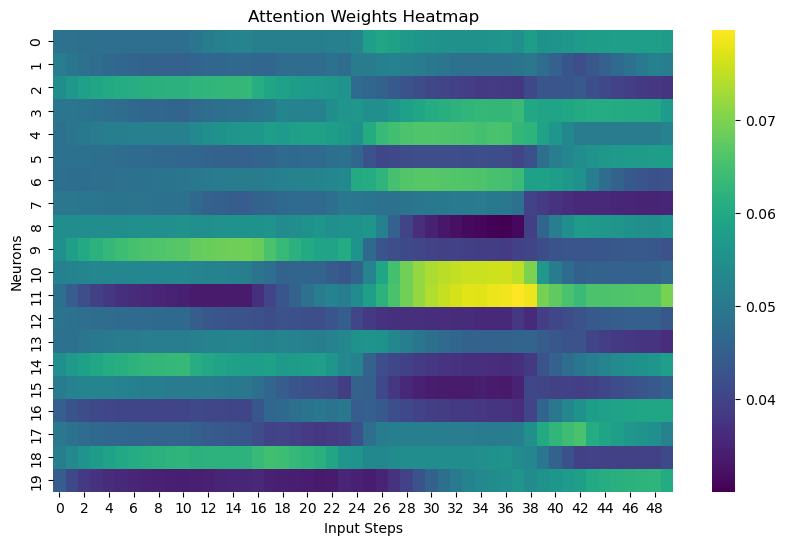

(15,)
15
[175.83999637536627, 172.92055916958296, 172.40552072181208, 171.66779850137942, 174.89227353474715, 176.3425314115479, 172.2160034044589, 168.68057928614937, 168.9294390666628, 172.9779131871248, 172.7350458452806, 169.01588483348493, 167.37992185084238, 164.26523903862625, 159.7490970071584]


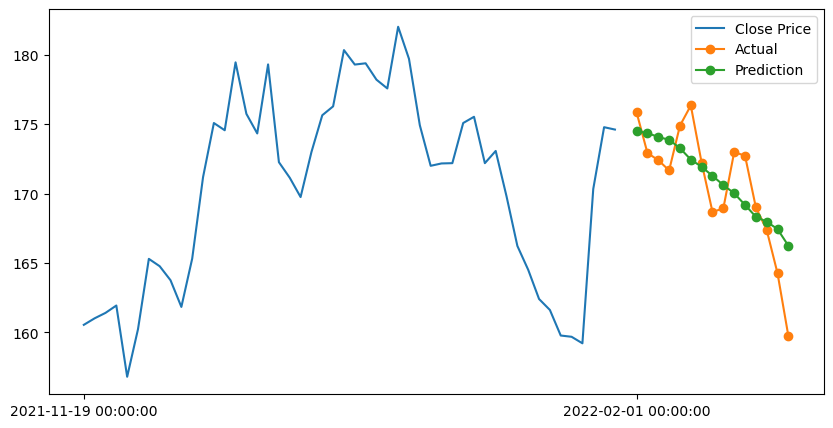

[]


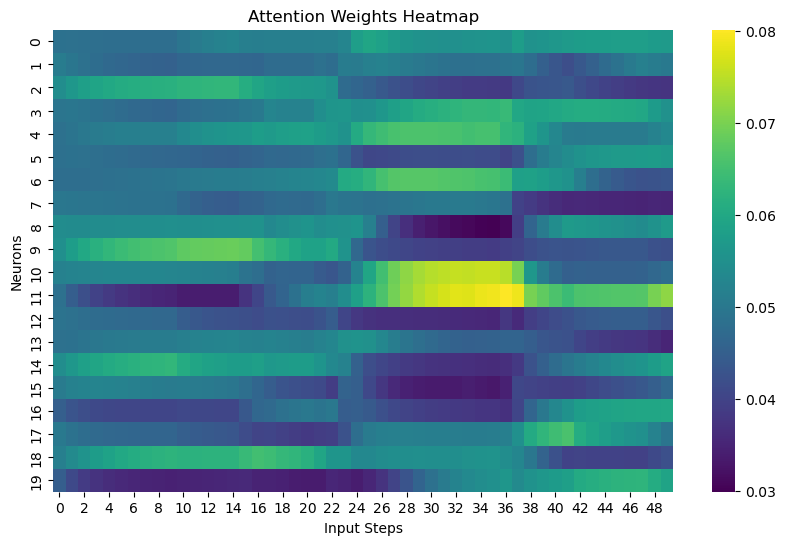

(15,)
15
[172.89999389943233, 172.3813273943448, 171.63672241197267, 174.87655848734465, 176.33493208862492, 172.17933580480178, 168.61900729072252, 168.86962010064846, 172.94661266709758, 172.70203450805056, 168.95667481268265, 167.30918770500702, 164.17256430211296, 159.61805953615905, 162.55110403790457]


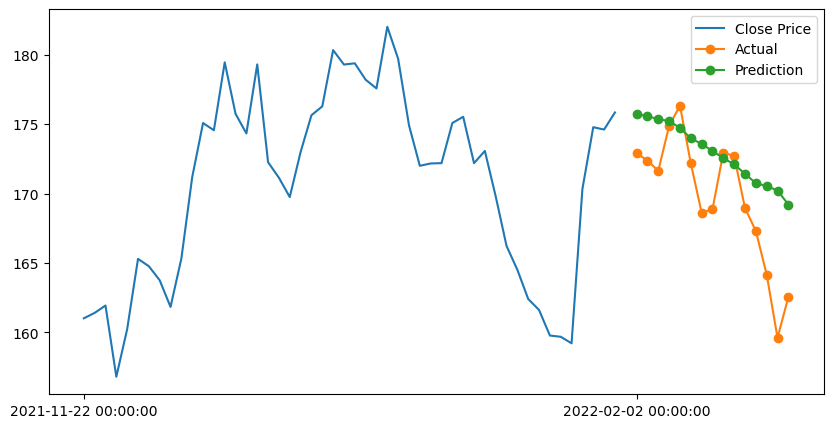

[]


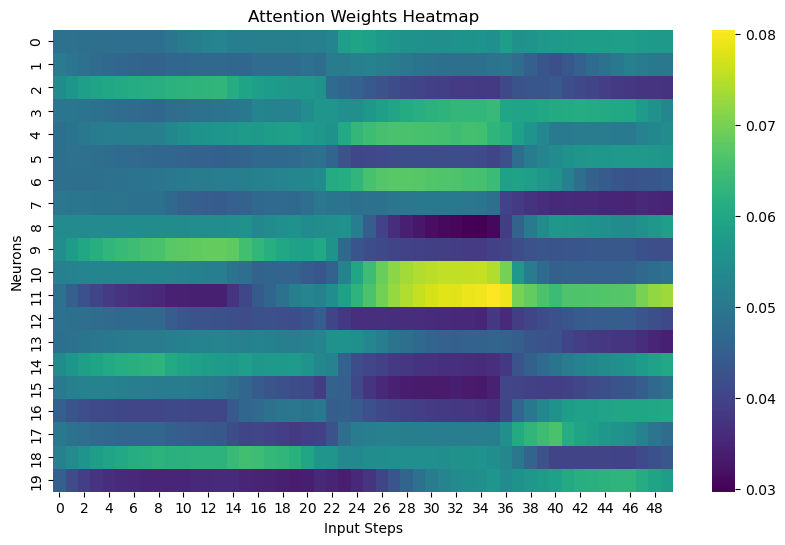

(15,)
15
[172.3899993705995, 171.6578440044219, 174.85074081239313, 176.28148367660634, 172.20124427382683, 168.7004435960851, 168.94686622011267, 172.95569245154934, 172.71520358048963, 169.03246539830218, 167.41252387877273, 164.32834406467722, 159.8499895228485, 162.73814776299284, 164.97987740071207]


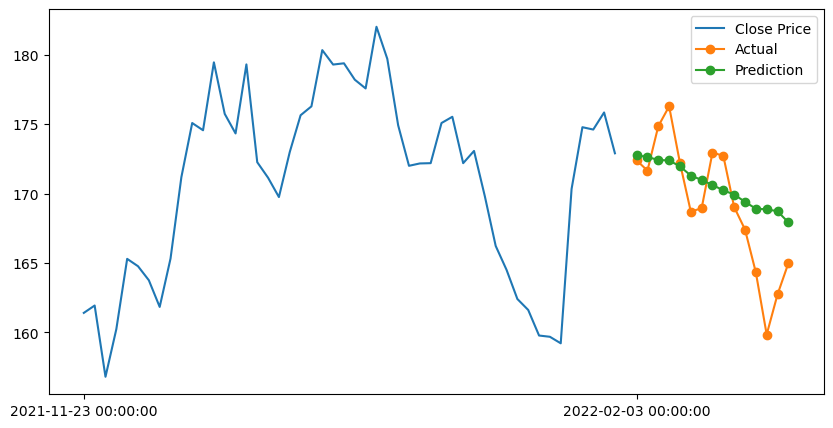

[]


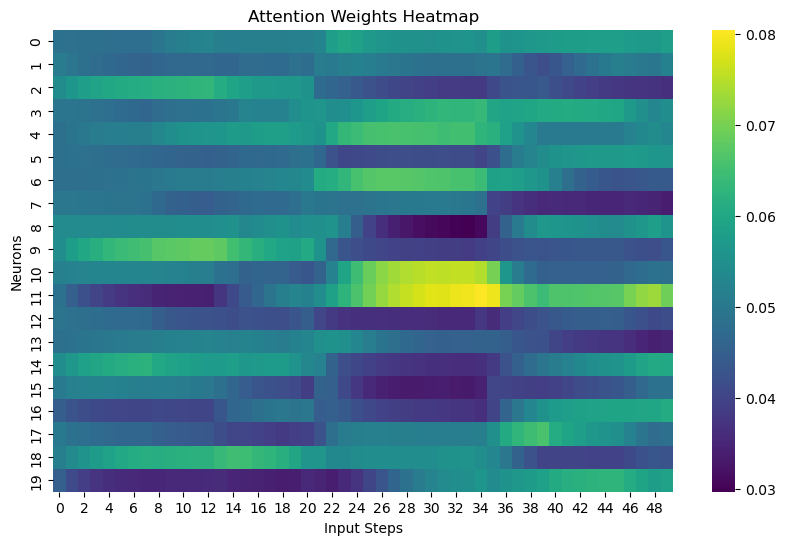

(15,)
15
[171.66000362571538, 174.84348250488128, 176.273242681579, 172.21425056503668, 168.72879576477075, 168.97449152824854, 172.97149312446797, 172.7317136114622, 169.0598382188024, 167.44467496014929, 164.36959239775308, 159.90444743543054, 162.78408661895637, 165.02242281389553, 165.30476071817256]


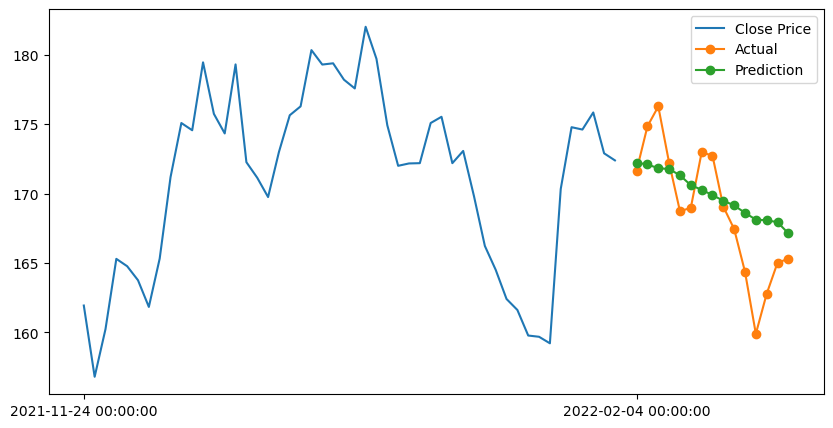

[]


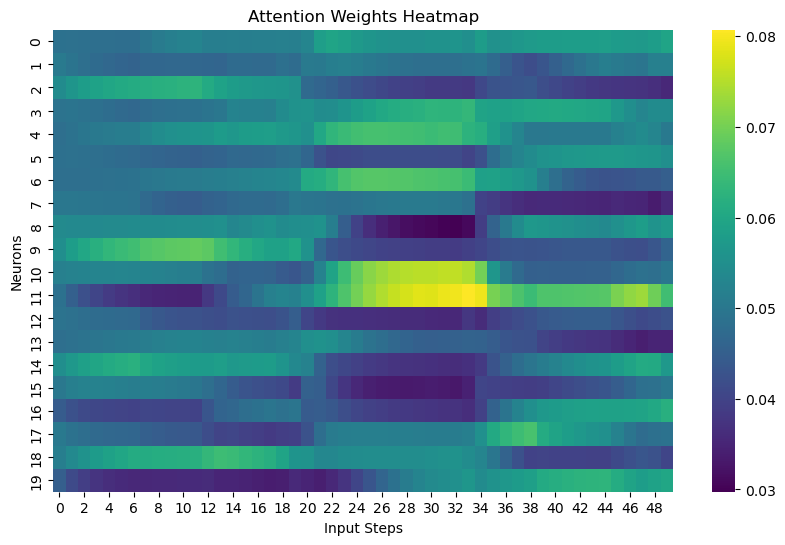

(15,)
15
[174.83000191021355, 176.25370768222368, 172.20273061138147, 168.73989412109577, 168.9841976289045, 172.96427368362768, 172.7255095312615, 169.0691829138102, 167.46085916024595, 164.39879821824724, 159.9525611784079, 162.82000635817323, 165.04886418508127, 165.33041141913068, 163.3343667505199]


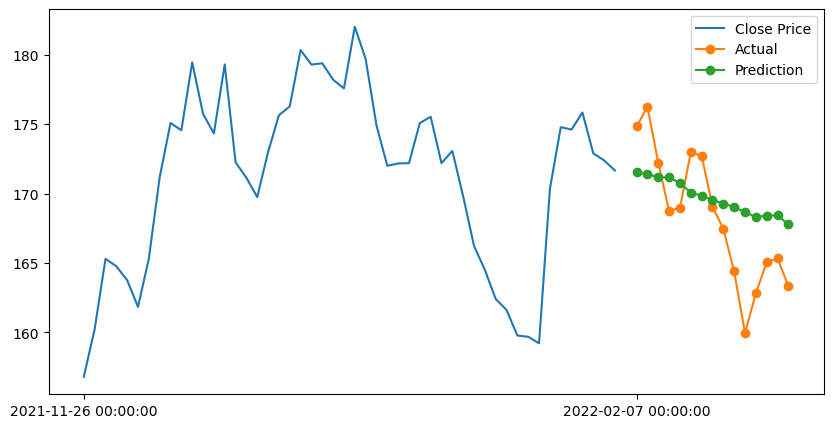

[]


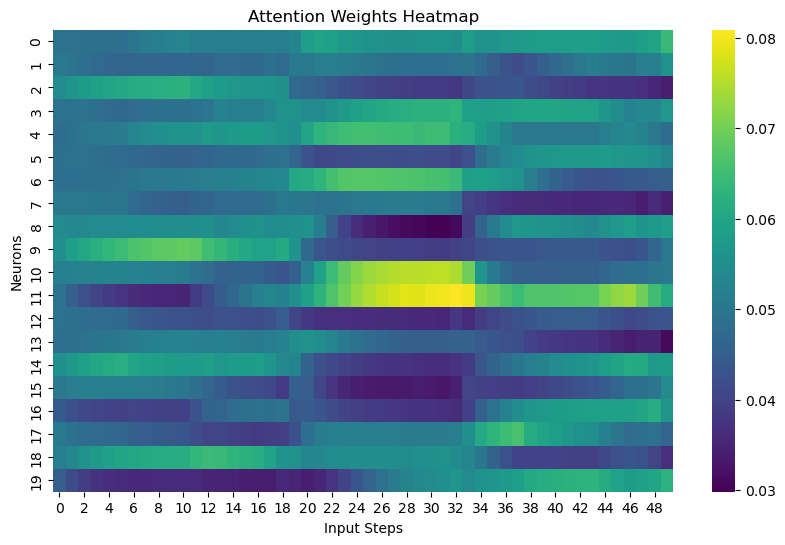

(15,)
15
[176.2799987867658, 172.15421343430262, 168.61942562021818, 168.86767720086263, 172.91542267740888, 172.67224933297896, 168.9484023355025, 167.3103781086474, 164.19177092773307, 159.6634264489196, 162.58382395173916, 164.85384148434105, 165.1405879738802, 163.10475519533605, 166.70419702637642]


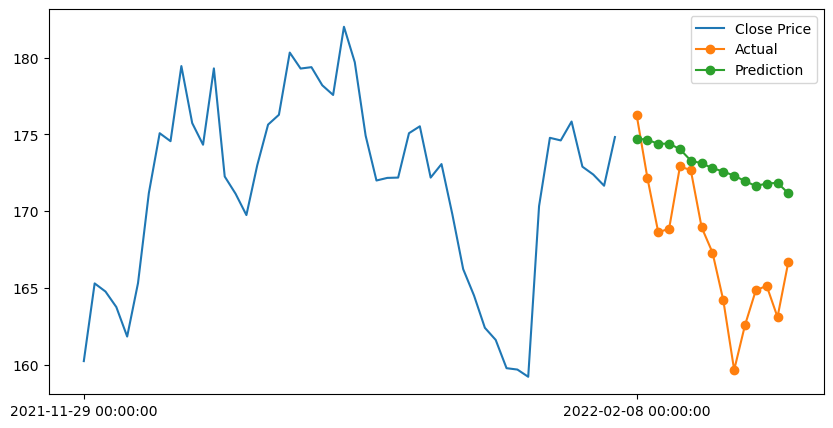

[]


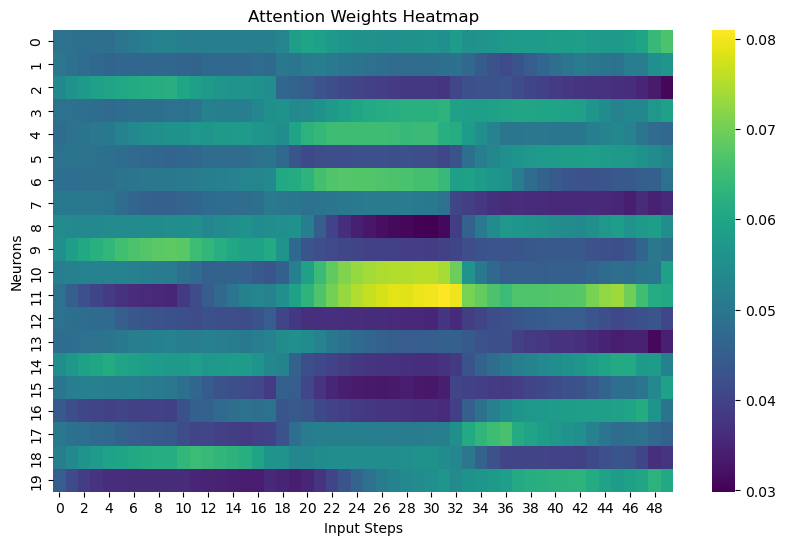

(15,)
15
[172.1199951799223, 168.55589070685815, 168.80676931072367, 172.87884436591477, 172.6340068246767, 168.87927515794715, 167.22766556184646, 164.083193421556, 159.51729196964808, 162.46191052962254, 164.75075502819283, 165.0398797224474, 162.98716224857006, 166.62168387870184, 166.27242400636732]


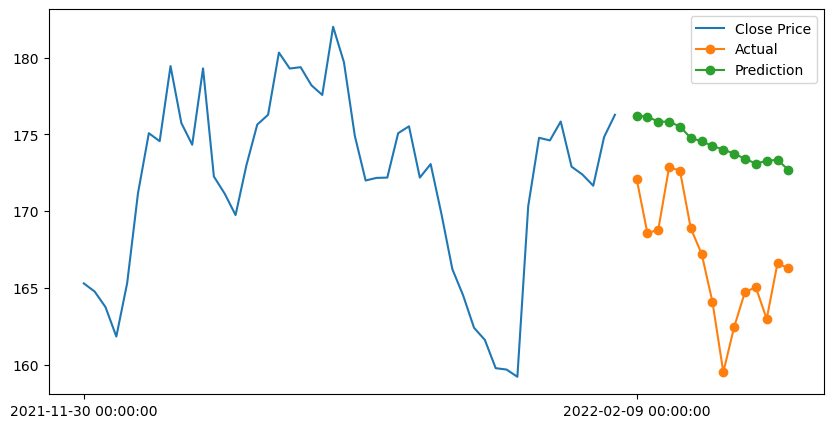

[]


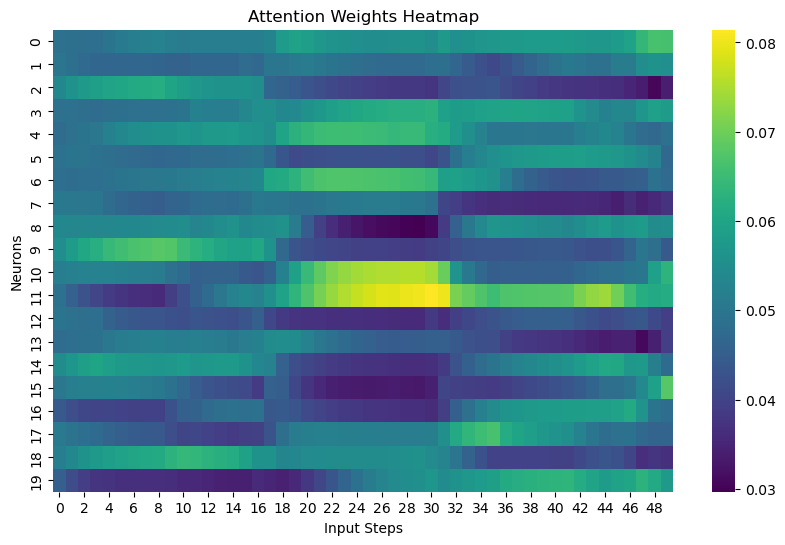

(15,)
15
[168.63999937887917, 168.88495753846254, 172.8699596797541, 172.63144134268245, 168.97058925208486, 167.35795572823136, 164.28768948599847, 159.8295380164612, 162.70466699124262, 164.9394974124247, 165.22179909899134, 163.21752337839138, 166.76627451047423, 166.42476565288197, 163.25634361063743]


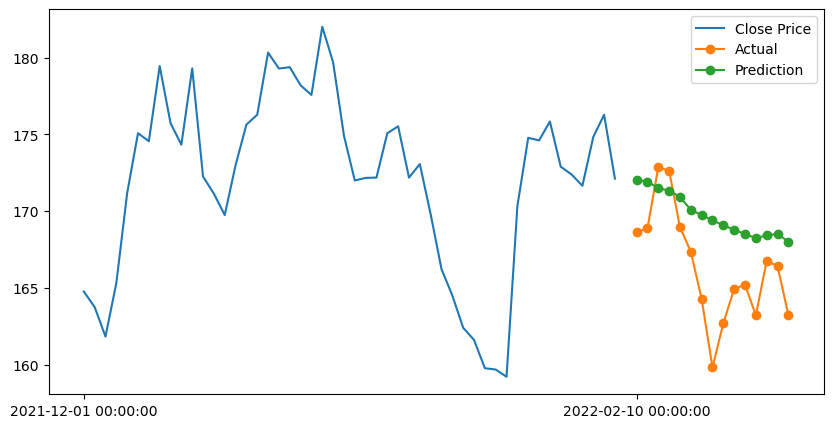

[]


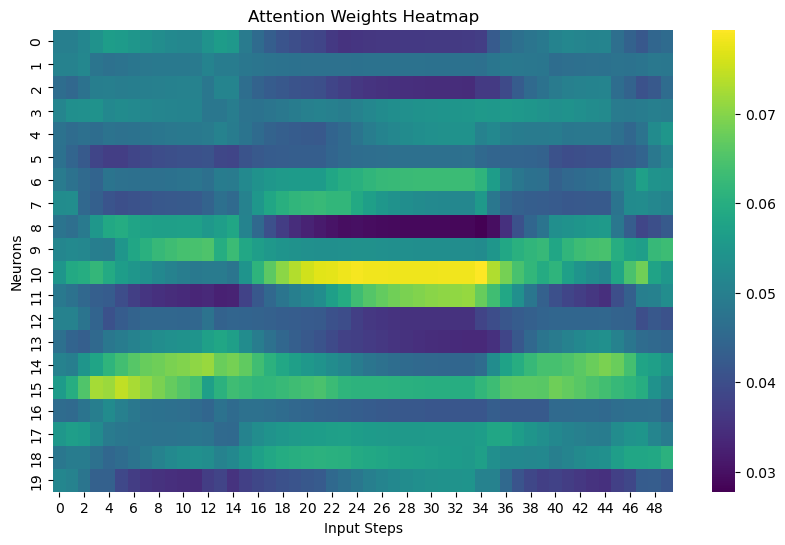

(15,)
15
[178.19000247021555, 177.96801347067424, 177.78615456918484, 179.47122402173588, 177.45740623727224, 176.56447863663456, 173.94368922861347, 174.45075744507804, 175.84383398077617, 177.2671837520082, 181.2192753002878, 176.50705306189968, 178.78356213029772, 180.37638148495586, 184.2978681473438]


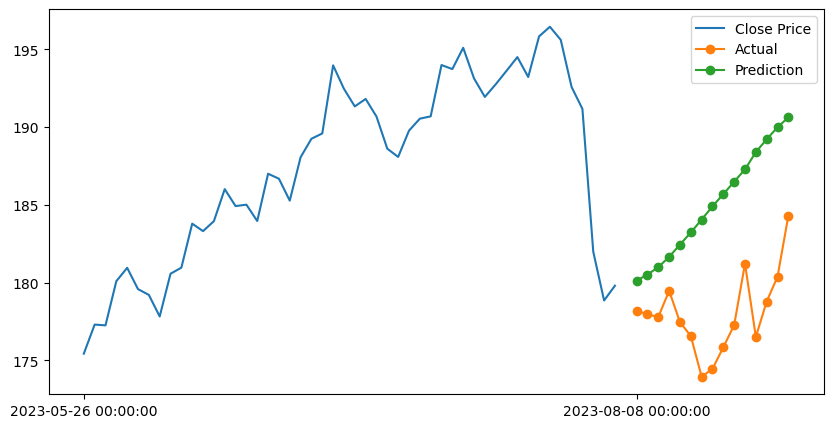

[]


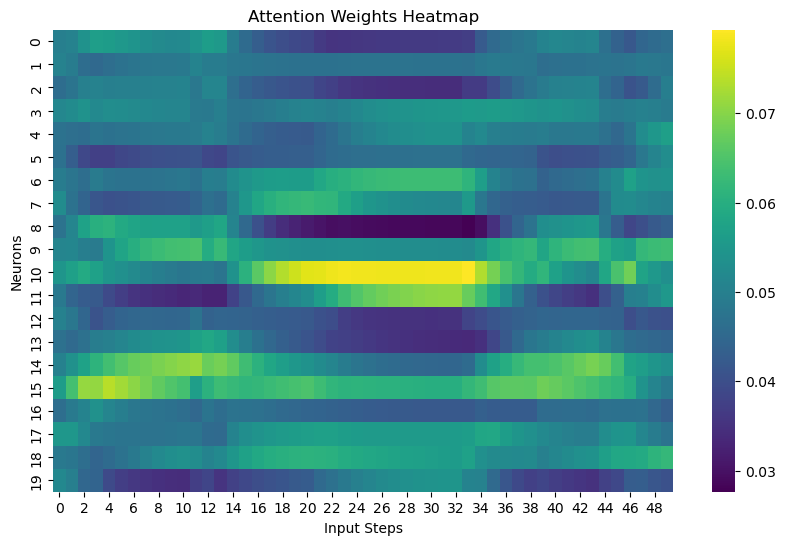

(15,)
15
[177.97000121949947, 177.78977075481444, 179.46354155666157, 177.47227540144763, 176.58861601085798, 173.99129419168503, 174.49382191802644, 175.87442429335377, 177.28502882564516, 181.2017317771678, 176.53170464751798, 178.78782894991278, 180.36638556769856, 184.25835471075303, 187.67466217973072]


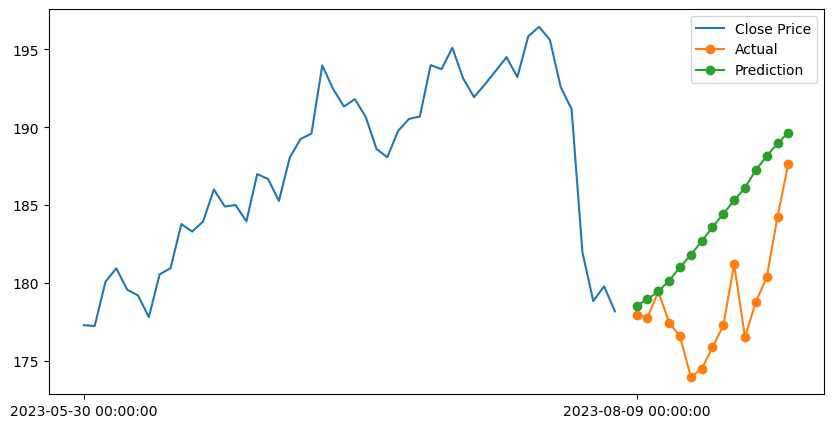

[]


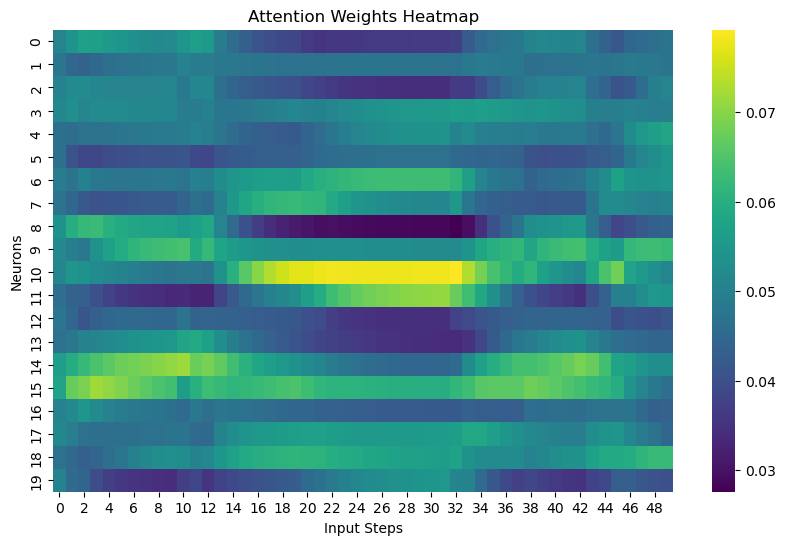

(15,)
15
[177.78999327648333, 179.4616975672213, 177.468376391047, 176.58780650053873, 173.99742207499014, 174.49932935848, 175.87822718134245, 177.2870901191853, 181.19895733683592, 176.5346960282488, 178.78803482026825, 180.36464248256772, 184.25180642919884, 187.66880997544618, 187.8774623442011]


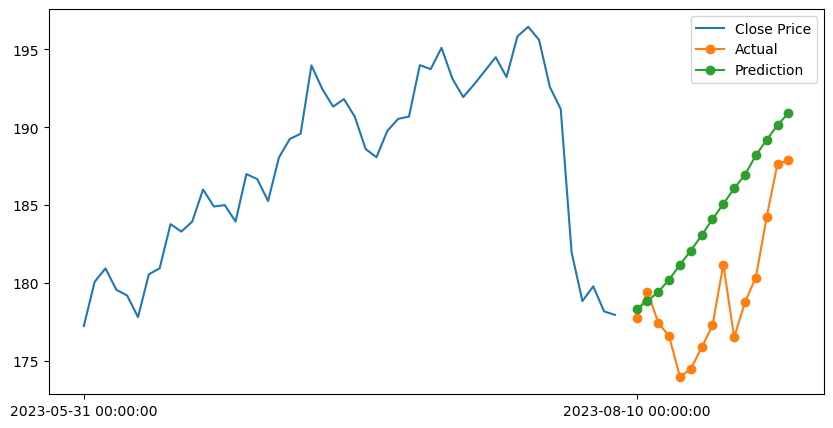

[]


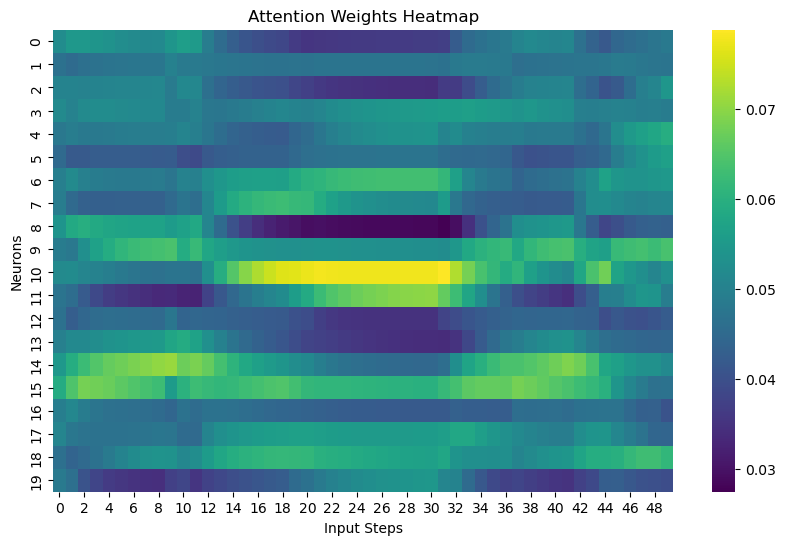

(15,)
15
[179.46000672990488, 177.46870170041484, 176.5870259892771, 174.00512127085403, 174.50579983846004, 175.88330297374944, 177.29074091577394, 181.1986514714403, 176.53910783458826, 178.79016748484756, 180.36518048576045, 184.24841275655535, 187.66196017117062, 187.87070169822323, 189.37540265243692]


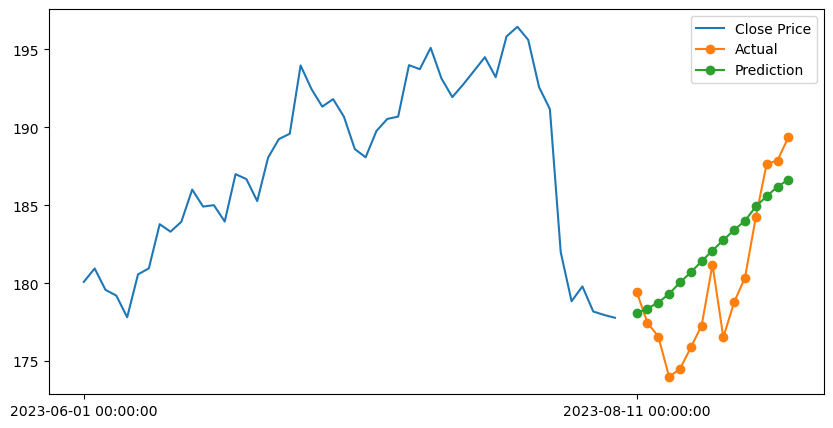

[]


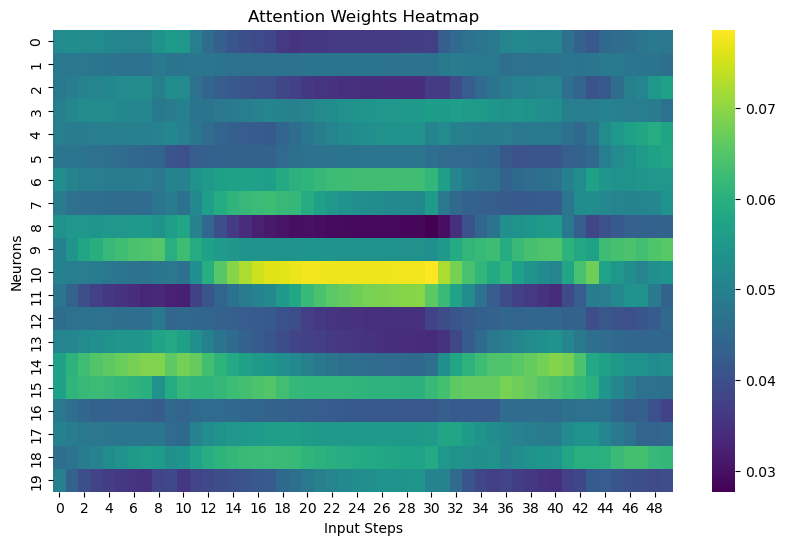

(15,)
15
[177.44999699759194, 176.5600395477056, 173.94796783218118, 174.45220502873352, 175.84064772151547, 177.26130598161544, 181.2059242449639, 176.50261267552563, 178.77481693450605, 180.3646243162036, 184.28433248710613, 187.7299439673825, 187.94064624119403, 189.4616684953147, 189.68899167279253]


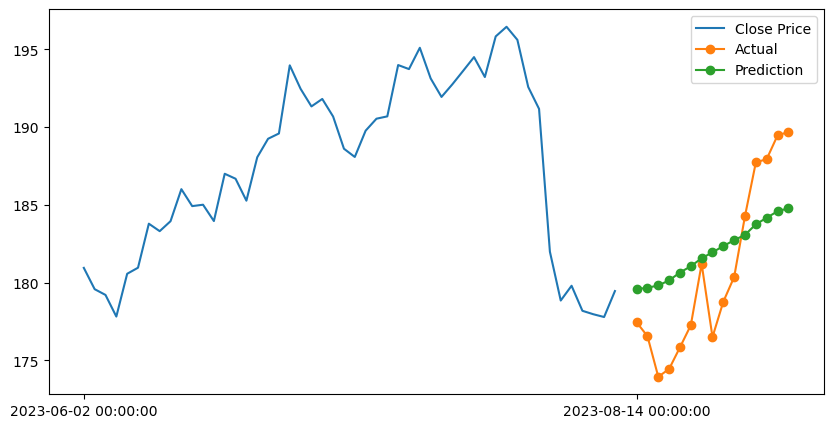

[]


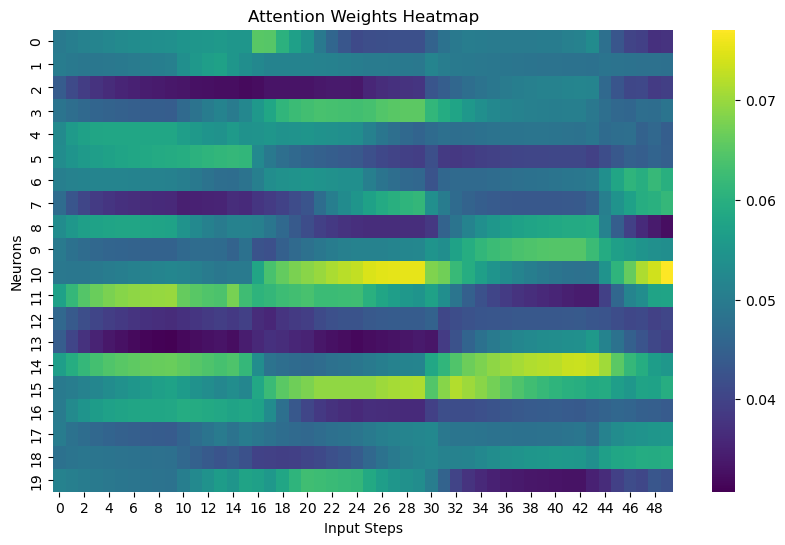

(15,)
15
[185.13999939903286, 186.19238445672968, 185.59440859247016, 185.92360996321966, 183.63805077466654, 182.67667119501277, 188.5784399542912, 191.46489714003474, 193.7251696663307, 194.96151960230026, 194.31411125678716, 193.99882421637423, 192.32401512667371, 191.65765378871555, 188.08639797153828]


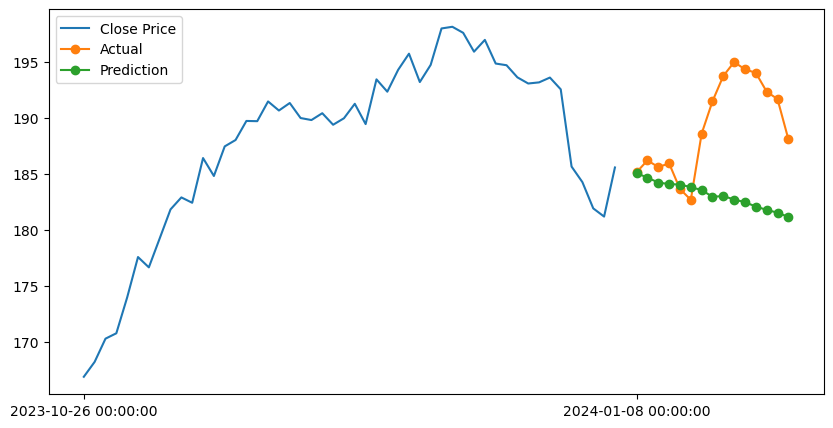

[]


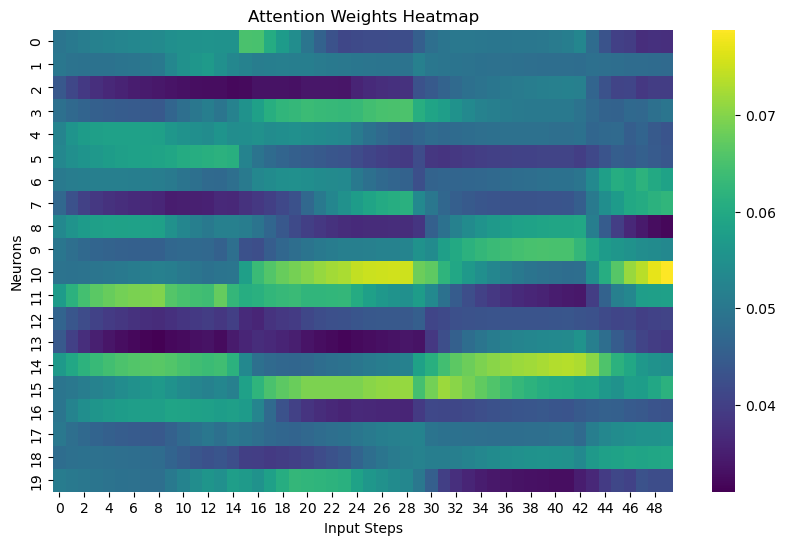

(15,)
15
[186.19000246953175, 185.59338006922655, 185.9225817531086, 183.6473594633884, 182.6895353048089, 188.57794594754796, 191.45786990011246, 193.7130265052247, 194.94657807561916, 194.30063507998346, 193.98606166309614, 192.31504335136643, 191.6501902616594, 188.08188602781928, 184.49802335118494]


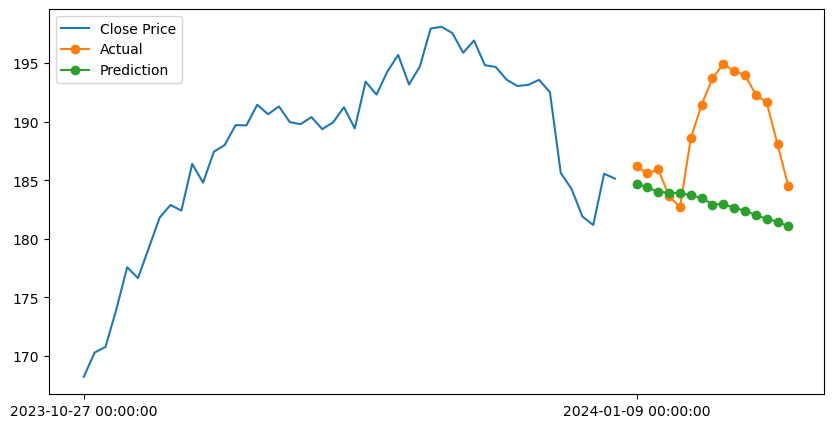

In [24]:
test_seq_elements = deepcopy(cluster_of_interest.test_seq_elements)

print(test_seq_elements[-1].start_date)
test_seq_elements = test_seq_elements[::-1]
print(test_seq_elements[0].start_date)
for i in range(50,80):
    attention_weight = attention_weights[i]
    sequence_element = test_seq_elements[i]
    prediction = predicted_y_transformed[i]
    print(sequence_element.y_feature_sets)
    plot = test_utils.plot_attention_weights(attention_weight)
    plot.show()
    sp.SequenceElement.visualize_future_movement(sequence_element, prediction, scaler, isCuma = False, target_features=target_features, num_days=num_days)